In [5]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [16]:
df=pd.read_csv('../../data/raw/chakala.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,AT,RH,WS,WD
0,08-12-2020 09:00,90.16,164.92,27.58,42.72,38.77,0.73,7.00,28.50,33.40,0.24,226.94
1,08-12-2020 10:00,92.55,179.31,18.75,38.75,38.93,0.68,19.25,29.50,32.26,0.22,82.35
2,08-12-2020 11:00,72.86,185.50,13.54,35.00,33.12,0.61,38.25,30.89,31.89,0.16,49.02
3,08-12-2020 12:00,70.44,166.99,16.41,19.86,35.42,0.55,56.00,32.75,29.67,0.18,124.27
4,08-12-2020 13:00,58.97,160.17,9.31,17.02,34.98,0.38,56.00,33.35,28.29,0.21,170.20


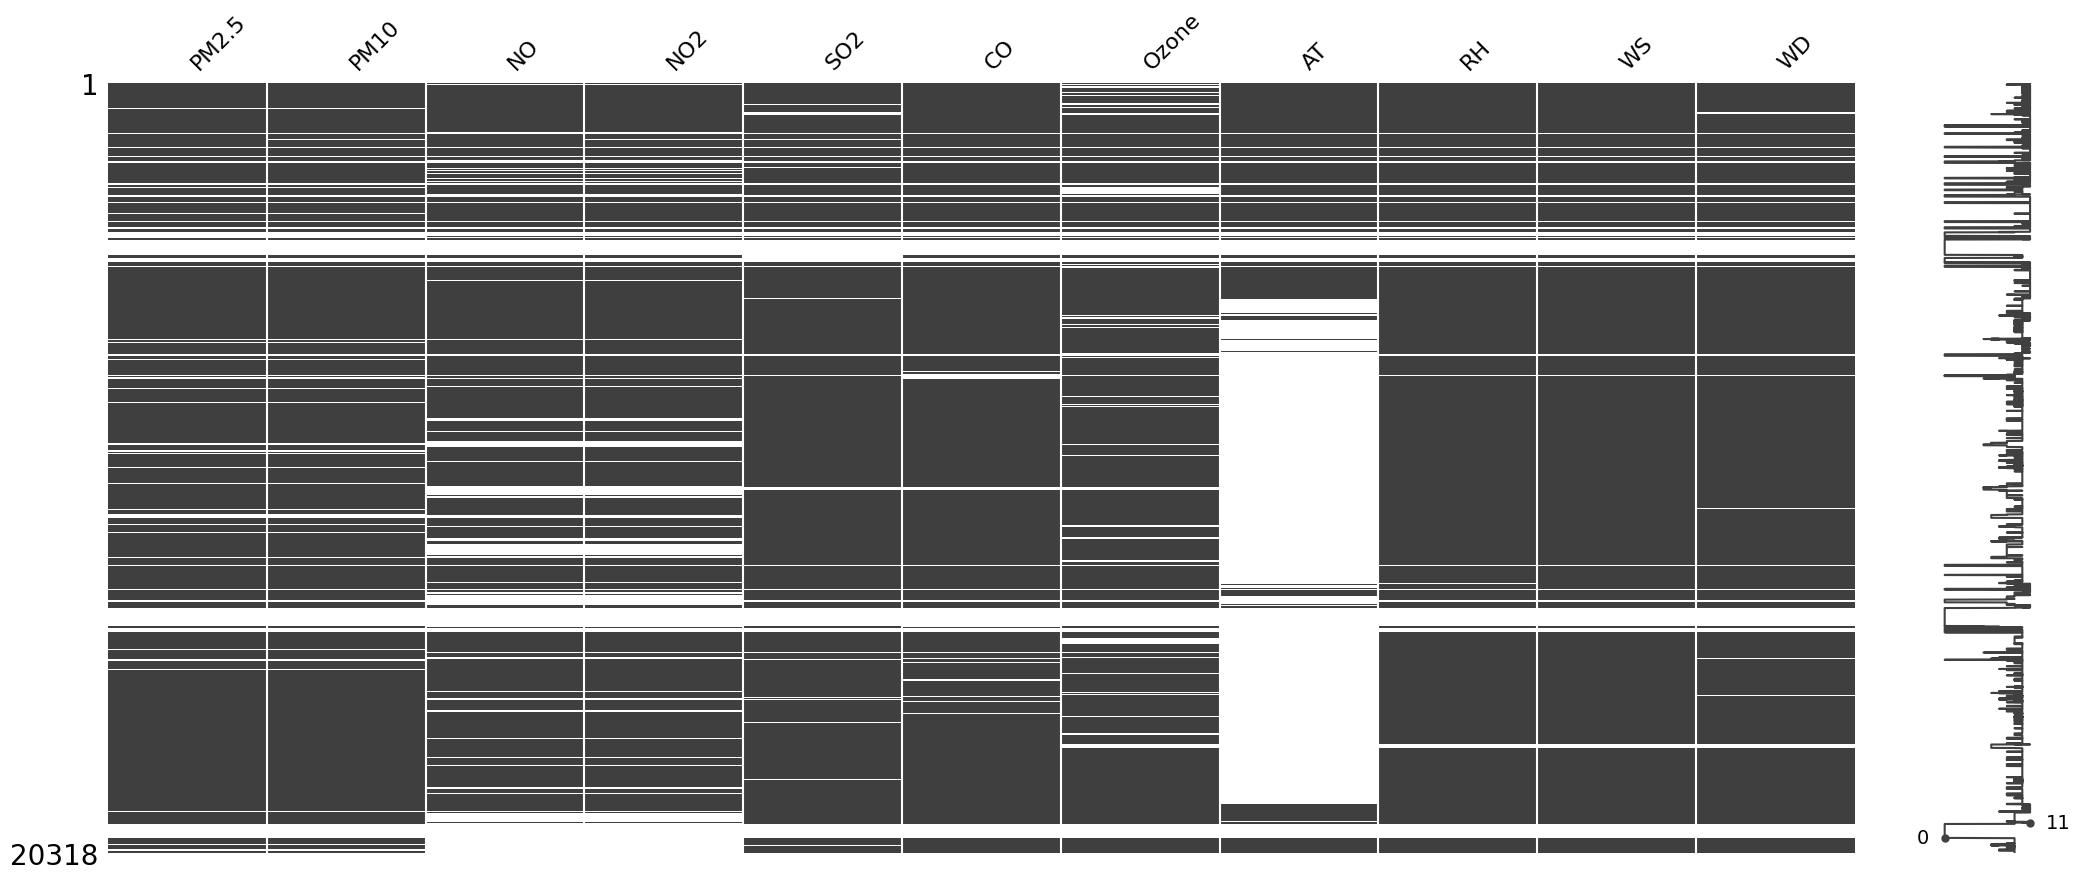

In [17]:
msno.matrix(df.iloc[:,1:])
plt.show()

In [18]:
df.drop("AT", axis=1, inplace=True)

<AxesSubplot:>

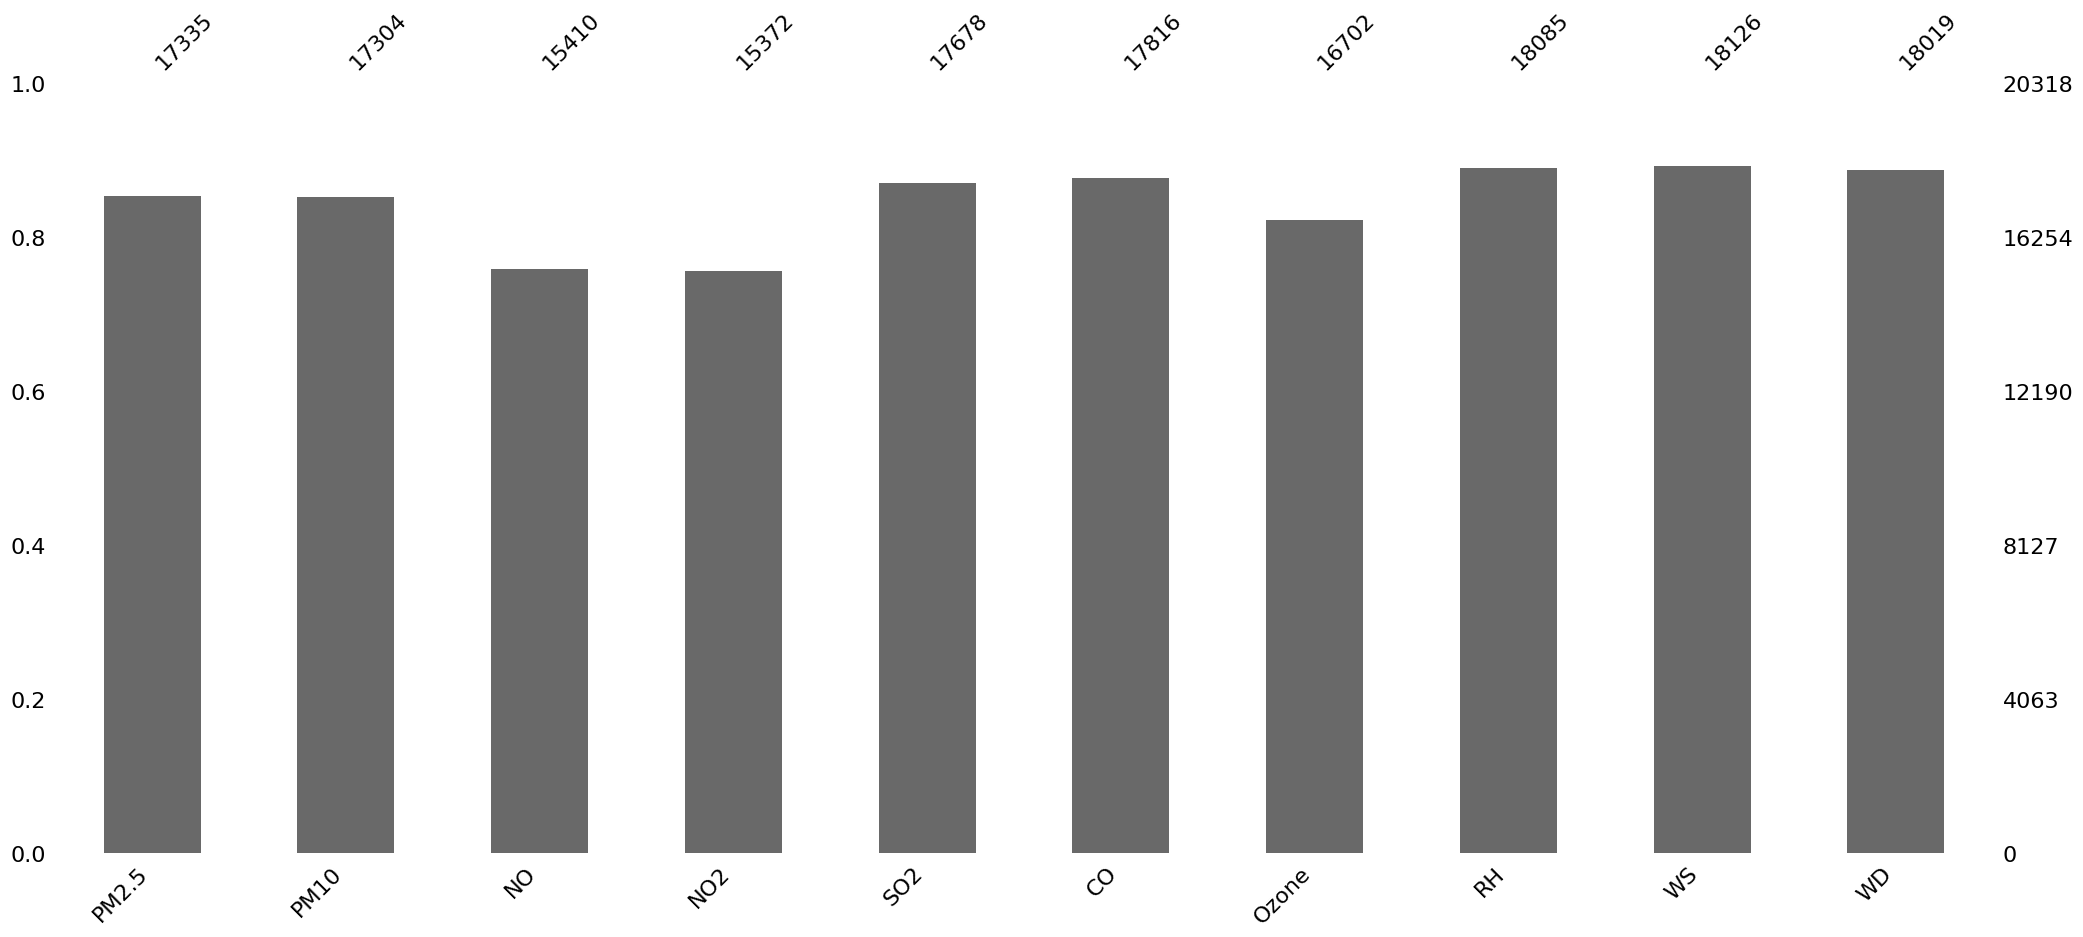

In [19]:
msno.bar(df.iloc[:,1:])

In [20]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
df.HOUR.head()

0     9
1    10
2    11
3    12
4    13
Name: HOUR, dtype: int64

In [21]:
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
df['From Date']

0       2020-12-08 09:00:00
1       2020-12-08 10:00:00
2       2020-12-08 11:00:00
3       2020-12-08 12:00:00
4       2020-12-08 13:00:00
                ...        
20313   2023-04-03 18:00:00
20314   2023-04-03 19:00:00
20315   2023-04-03 20:00:00
20316   2023-04-03 21:00:00
20317   2023-04-03 22:00:00
Name: From Date, Length: 20318, dtype: datetime64[ns]

In [22]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date       0
PM2.5        2983
PM10         3014
NO           4908
NO2          4946
SO2          2640
CO           2502
Ozone        3616
RH           2233
WS           2192
WD           2299
HOUR            0
dtype: int64


In [23]:
df.set_index('From Date',inplace=True)

In [24]:
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)

In [25]:
cols=['SO2','CO','Ozone','PM2.5','PM10','NO','RH','NO2','WS','WD']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [26]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
Ozone        0
RH           0
WS           0
WD           0
HOUR         0
MONTH        0
dtype: int64


In [27]:
df.to_csv('../../data/processed/chakala_cleaned.csv', index=False)

In [6]:
df=pd.read_csv('../../data/raw/kurla.csv')
df.drop("To Date", axis=1, inplace=True)
df.head()

,From Date,PM2.5,PM10,NO,NO2,SO2,CO,WD,WS,RH,Ozone,AT
0,01-06-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-06-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-06-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-06-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


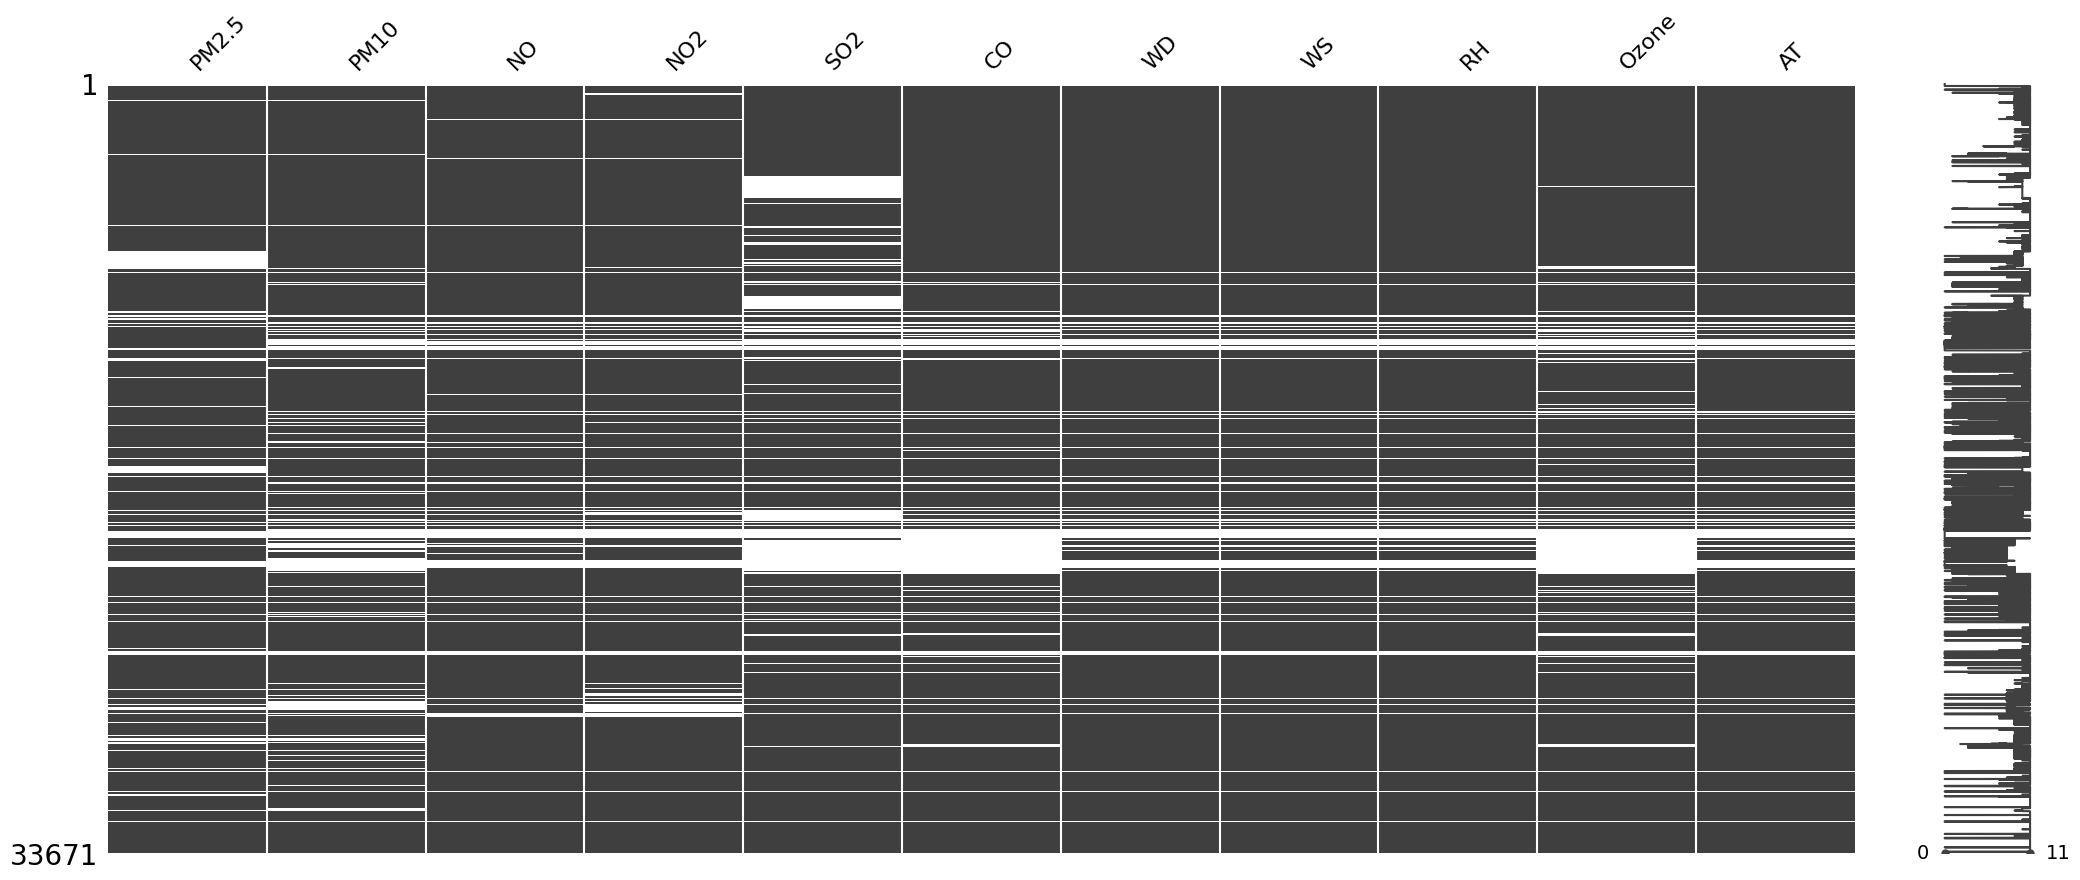

In [7]:
msno.matrix(df.iloc[:,1:])
plt.show()

<AxesSubplot:>

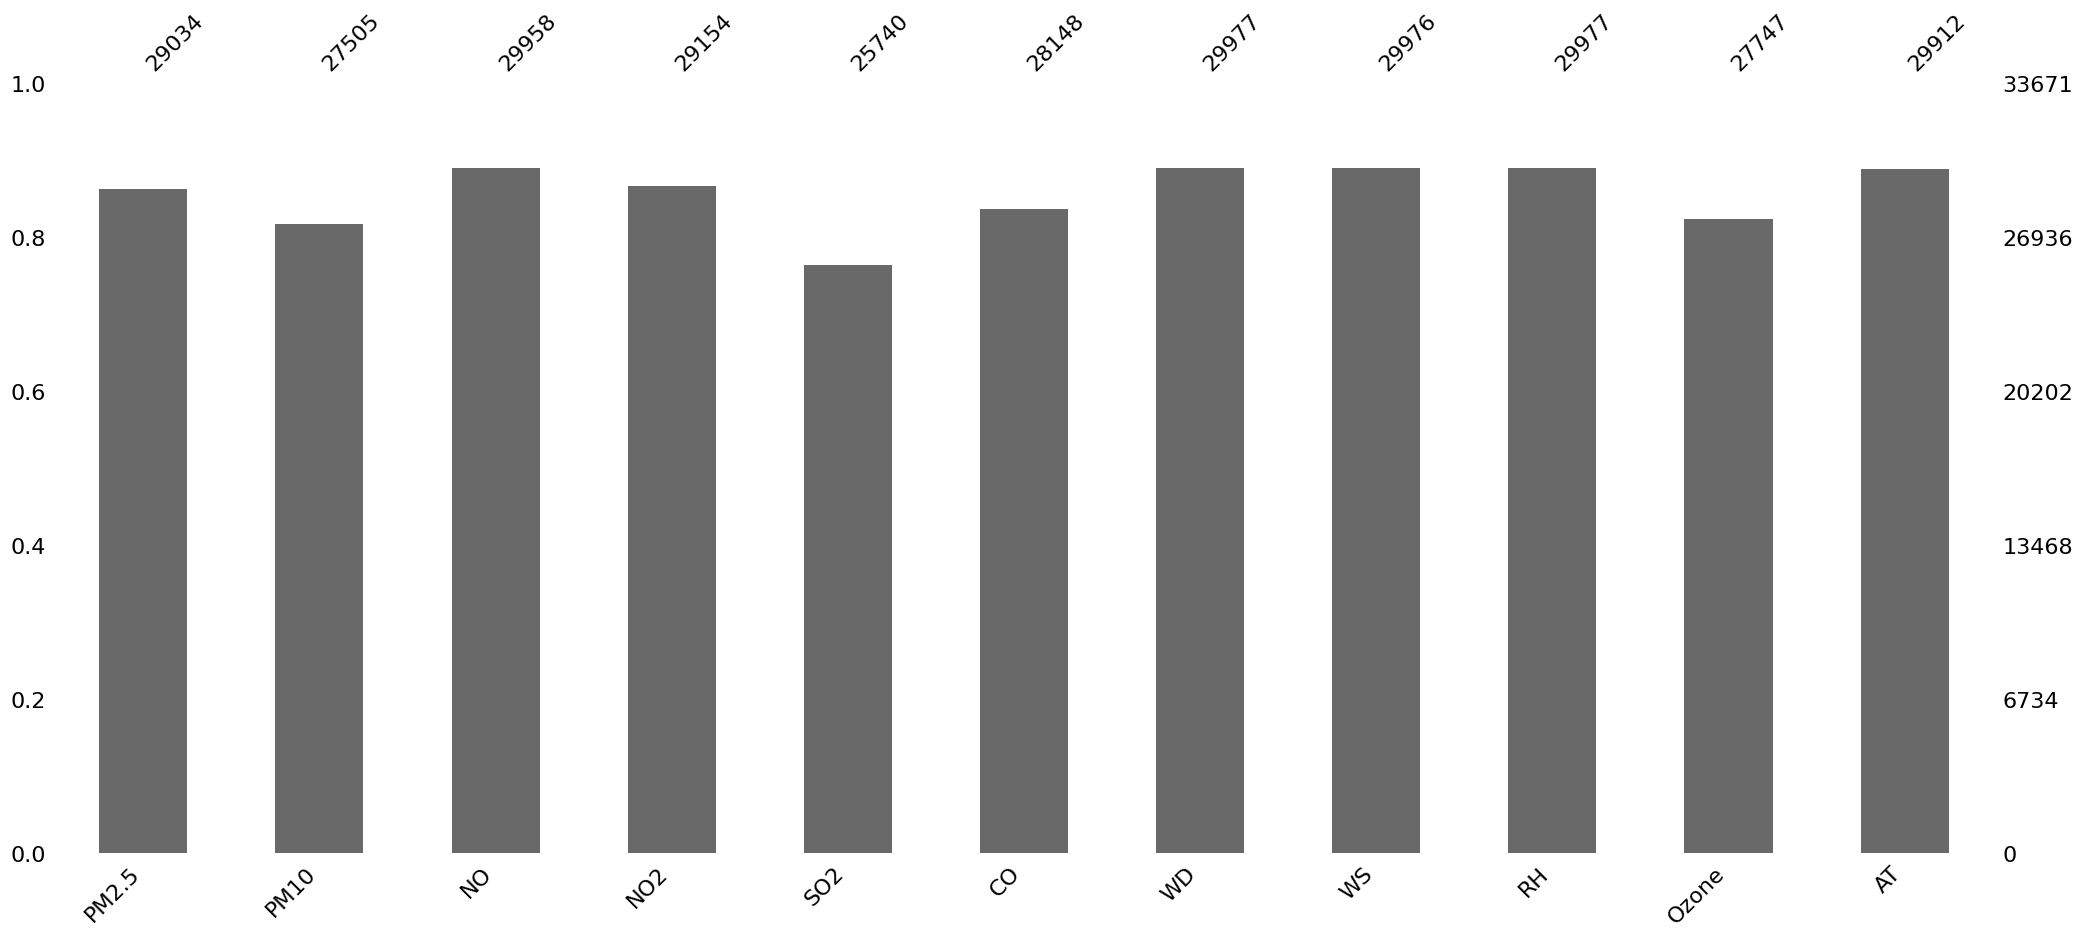

In [8]:
msno.bar(df.iloc[:,1:])

In [9]:
df['HOUR']=df['From Date'].apply(lambda x: int(x.split(' ')[1][:2]))
# df.HOUR.head()
df['From Date'] = pd.to_datetime(df['From Date'], format = '%d-%m-%Y %H:%M')
# df['From Date']
df.set_index('From Date',inplace=True)
df['MONTH']=df.index.month     #Create month column (Run once)
df.reset_index(inplace=True)
cols=['SO2','CO','Ozone','PM2.5','PM10','NO','NO2','RH','WS','WD','AT']
for col in cols:
  df[col]=df[col].fillna(df.groupby(['MONTH','HOUR'])[col].transform('mean'))

In [10]:
print('Count of missing values:\n',df.shape[0]-df.count())

Count of missing values:
 From Date    0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
WD           0
WS           0
RH           0
Ozone        0
AT           0
HOUR         0
MONTH        0
dtype: int64


In [33]:
df.to_csv('../../data/processed/kurla_cleaned.csv', index=False)